# SIS with high and low risk classes
This is the Python version of program 3.1 from page 58 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters (rates here are specified in terms of years)
beta=[10., 0.1, 0.1, 1.] #transmission matrix
gamma=1.0 #reovery rate

nT=1.0 #total population

#high risk group
nH=0.2  #total high risk 
IH=1e-5 #initially infected high risk
SH=nH-IH #initial susceptibles high risk

#low risk group
nL=nT-nH #total
IL=1e-3 #infecteds
SL=nL-IL #susceptibles


ND=15. #number of years
TS=1.0 #time step

INPUT = (SH,IH,SL,IL) #initial conditions

In [3]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP   
	Y[0] = - (beta[0] * V[1] + beta[1] * V[3]) * V[0] + gamma * V[1]
	Y[1] = (beta[0] * V[1] + beta[1] * V[3]) * V[0] - gamma * V[1]
	Y[2] = - (beta[2] * V[1] + beta[3] * V[3]) * V[2] + gamma * V[3]
	Y[3] = (beta[2] * V[1] + beta[3] * V[3]) * V[2] - gamma * V[3]
	return Y   # For odeint

In [4]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

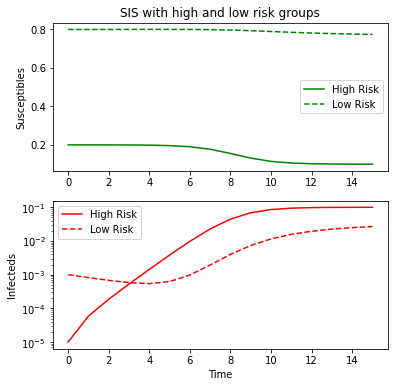

In [10]:
#Ploting
fig = plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('SIS with high and low risk groups')
fig.add_subplot(211)
plt.plot(RES[:,0], '-g', label='High Risk')
plt.plot(RES[:,2], '--g', label='Low Risk')
plt.legend(loc=0)
plt.ylabel('Susceptibles')
fig.add_subplot(212)
plt.semilogy(RES[:,1], '-r', label='High Risk')
plt.semilogy(RES[:,3], '--r', label='Low Risk')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('Infecteds')
plt.show()
fig.savefig('SIS_two_risk_classes.pdf')